In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,The Rising Son,1990
1,Ashes of Kukulcan,2016
2,The Thousand Plane Raid,1969
3,Crucea de piatra,1993
4,The 86,2015


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


### Using groupby(), plot the number of films that have been released each decade in the history of cinema.

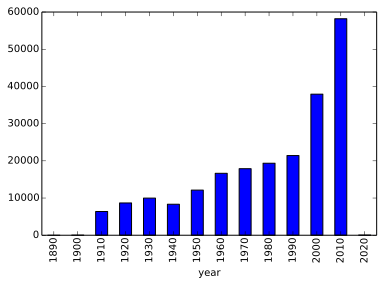

In [9]:
titles.groupby(titles['year']//10 *10)['year'].size().plot(kind='bar')

### Use groupby() to plot the number of "Hamlet" films made each decade.

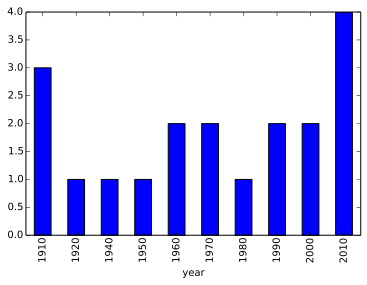

In [10]:
titles[titles['title']=='Hamlet'].groupby(titles[titles['title']=='Hamlet']['year']//10 *10)['year'].size().plot(kind='bar')

### How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

In [18]:
c=cast[(cast['year']>=1950)&(cast['year']<1960)&(cast['n']==1)]
c[c['type']=='actor'].groupby('year').size()

year
1950    604
1951    632
1952    592
1953    634
1954    628
1955    606
1956    616
1957    705
1958    694
1959    679
dtype: int64

In [19]:
c[c['type']=='actress'].groupby('year').size()

year
1950    271
1951    273
1952    285
1953    291
1954    297
1955    265
1956    287
1957    284
1958    276
1959    289
dtype: int64

### In the 1950s decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5?

### Use groupby() to determine how many roles are listed for each of the Pink Panther movies.

In [21]:
cast[cast['title'].str.contains("Pink Panther")].groupby('title').size()

title
Curse of the Pink Panther          67
Revenge of the Pink Panther        64
Son of the Pink Panther            46
The Pink Panther                  108
The Pink Panther 2                 82
The Pink Panther Strikes Again     73
The Return of the Pink Panther     30
Trail of the Pink Panther          40
dtype: int64

### List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [42]:
type(cast[cast['name']=='Frank Oz'].groupby('title'))

pandas.core.groupby.DataFrameGroupBy

In [40]:
cast[cast['name']=='Frank Oz'].groupby('title').filter(lambda x : len(x)!=1).sort('year')['title'].unique()

array(['The Muppet Movie', 'An American Werewolf in London',
       'The Great Muppet Caper', 'The Dark Crystal',
       'The Muppets Take Manhattan',
       'Sesame Street Presents: Follow that Bird',
       'The Muppet Christmas Carol', 'Muppet Treasure Island',
       'The Adventures of Elmo in Grouchland', 'Muppets from Space'], dtype=object)

### List each of the characters that Frank Oz has portrayed at least twice.

In [41]:
cast[cast['name']=='Frank Oz'].groupby('character').filter(lambda x : len(x)!=1)['character'].unique()

array(['Miss Piggy', 'Fozzie Bear', 'Sam the Eagle', 'Animal',
       'Cookie Monster', 'Bert', 'Grover', 'Yoda'], dtype=object)